<a href="https://colab.research.google.com/github/praf62/RClasses/blob/master/LSA_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latent Semantic Analysis (LSA) and Latent Semantic Indexing (LSI) 


## Summary
For performing similarity studies of the business, according to their descriptions and the set of products (i.e. goods and services) they negociate, via LSA. 

Further, a similarity-based rank of business in the face of a query provided by a PlugaParceiro and Allupe user is also provided, i.e. an information retrieval tool, via LSI.

This type of study involves four steps: 
1.   Data access. In our applications the textual data would involve at least three columns:`item` (representing the source of information, e.g. the business as a all or a product of a business), `business` (highlighting the business under study), and `description` (bringing the description of the item). For instance, [here](https://drive.google.com/open?id=16GB4zXrnc_xKpMI_bKi9G1SJbb5kZ2Ki&authuser=paulo.firmino%40ufca.edu.br&usp=drive_fs) we bring the  `csv` file template used in the present exercise. In the example, the content `pi` means the i-th product and `bj` the j-th business.

2.   Preprocessing. In order to promote machine learning models that encapsulate the unstructured data of the `description` field, a preprocessing step is necessary. It leads to a document-term matrix that allows posterior quantitative modeling. One can see each document as a busuness description and each term as an informative word inside such description. Thus, punctuation, articles, prepositions, and verbs might be discarded from the original business descriptions. Further, the use of stems instead of the original words is considered.

3.   LSA. In the face of the document-term matrix resulting from the preprocessing, a LSA model is then computed, via Singular Value Decomposition (SVD). SVD leads to a compression of the document-term matrix, via a reduced number of components (i.e. topics) that reflect the similarity between terms as well as between documents. This SVD model must be saved.  Then, when demanded, this SVD model must be loaded and reused, under a minimal time and memory consumption, mainly in comparison with near similar `SQL` procedures.

4.   LSI. The SVD model is also used in a search machine tool. In this way, a user's query is mapped to the document-term matrix structure and, via the SVD model, is mapped to the respective compressed dimension. Then, a distance measure (e.g. the cosine metric) is applied between the bag of words of the user's query and the items descriptions, in the SVD model mapping space. In terms of the cosine distance metric, the lesser the value of the metric the greater the similarity between the user's query and the item description, leading to the rank of the items.

**Academic Bibliography**
HAPKE, Hannes Max; LANE, Hobson; HOWARD, Cole. Natural language processing in action. 2019.



## Data access

In [ ]:
import pandas as pd
class DataAccess:
  def __init__(self, filePath, delimiter):
    self.filePath = filePath
    #fOpen = open("D:\por_br_newscrawl_2011_1M_sentences.txt", "r")
    #fOpen = open("D:/corpus/trash2.txt", "r", encoding="utf-8")
    #fOpen = open("/content/corpus/trash2.txt", "r", encoding="utf-8")
    #fRows = fOpen.read()
    #fRows = fRows.lower()
    self.df =  pd.read_csv(filePath, delimiter=delimiter)


In [ ]:
da= DataAccess(filePath="/content/trash2.csv", delimiter = ",")
df = da.df
display(df)

,item,business,description
0,p597,b9,TAM M\n50% poliéster e 50% Algodão \nBlusa fem...
1,p593,b9,TAM G\n50%poliéster e 50% Algodão \nBlusa fem...
2,p589,b9,TAM G \n100% Algodão no fio 30 penteado \nBlus...
3,p585,b9,TAM G\n100% Algodão no fio 30 penteado \nBlusa...
4,p581,b9,TAM G\n100% Algodão no fio 30 penteado \nBlusa...
5,p577,b9,TAM P \n50% poliéster e 50%Algodão \nBlusa fem...
6,p560,b7,"O desktop compacto Lenovo V50s é rápido, respo..."
7,p556,b7,processor\n10ª geração de Intel® Core™ i3-1010...
8,p536,b7,Plataforma para ciência de dados.
9,p458,b1,Limpeza com autonomia


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## Preprocessing
[Here](https://analyticsindiamag.com/complete-tutorial-on-text-preprocessing-in-nlp/) we have a nice material.

### Libraries 

In [ ]:
! pip install contractions
import nltk#natural language tool kit
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
import re, string, unicodedata
nltk.download('punkt')#tokenizer
nltk.download('wordnet')#dictionary
nltk.download('rslp')#Stemmer
nltk.download('stopwords')
!python -m spacy download pt
import spacy
nlp = spacy.load('pt')
from operator import itemgetter
import pickle
from operator import itemgetter

     |████████████████████████████████| 287 kB 5.4 MB/s 
     |████████████████████████████████| 106 kB 58.5 MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 21.2 MB 1.1 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186281 sha256=30c1dac5dc3ea1958006a0f5ff4064bf04fa8bf569be308bfe5578908aa96845
  Stored in directory: /tmp/pip-ephem-wheel-cache-zbmqjypu/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via

### Classes and methods for: Stopwords, Stemmig, Lemmatization, etc
[Here](https://www.alura.com.br/artigos/lemmatization-vs-stemming-quando-usar-cada-uma) we have a nice material.

In [ ]:
class Preprocessing:
  """To preform preprocessing in the original corpus.

  Keyword arguments:
  corpus -- the set of items descriptions. An item might represent 
  a business itself or a business product.
  tokenFunction -- The tokenizer considered for spliting the original items.
  tokenFunction might be either: nltk.sent_tokenize or nltk.word_tokenize
  """
  def __init__(self, corpus, tokenFunction):
    self.corpus = corpus
    self.newCorpus = []
    self.tokenFunction = tokenFunction

  def computePreprocessing(self):
    for text in self.corpus:
      #print(type(text))
      itnr_i = ItemTextNoiseRemoval(text=text, tokenFunction = self.tokenFunction)#, corpus = self.corpus, tokenFunction = self.tokenFunction)
      #print("text: " + itnr_i.cleanText)
      itnr_i.convertTextToLower()# ; print("convertTextToLower: " + itnr_i.cleanText)
      itnr_i.computeHtmlRemoval()# ; print("computeHtmlRemoval: " + itnr_i.cleanText)
      itnr_i.computeRoundBracketsRemoval()# ; print("computeRoundBracketsRemoval: " + itnr_i.cleanText)
      itnr_i.computeUrlRemoval()# ; print("computeUrlRemoval: " + itnr_i.cleanText)
      itnr_i.computePucRemoval()#;  print("computePucRemoval: " + itnr_i.cleanText)
      itnr_i.computeWhiteSpace()#;  print("computeWhiteSpace: " + itnr_i.cleanText)
      #newText_i = remove_non_ascii(newText_i)
      itnr_i.replaceContrations()#;  print("replaceContrations: " + itnr_i.cleanText)
      itnr_i.convertNumberToText()#;  print("convertNumberToText: " + itnr_i.cleanText)
      itnr_i.convertTextToTokens();  #print("convertTextToTokens: " + itnr_i.tokens)
      itnr_i.computeStopwordsRemoval();  #print("computeStopwordsRemoval: " + itnr_i.cleanText)
      itnr_i.computeStemming()
      itnr_i.computeLemmatization()
      #newCorpus.append([itnr_i.lemmas, itnr_i.stems])
      self.newCorpus.append([itnr_i.stems, itnr_i.lemmas])
    #corpus = {'stemmed': newTexts[0], 'lemmed': newTexts[1]}
    #corpus = pd.corpusFrame(corpus)
    #display(corpus)
    #return corpus
    #return(newTexts)
    self.saveStemmedCorpus()
  
  def saveStemmedCorpus(self):
    stemmedCorpus = list(map(itemgetter(0), self.newCorpus))
    pickle.dump(stemmedCorpus, open("stemmedCorpus.pickle", "wb"))

#for a given item text (business or product description), the noise removal is performed
class ItemTextNoiseRemoval:#(Preprocessing):
  """ItemTextNoiseRemoval Class#: inherits from Preprocessing.
  
  The class is dedicated to each item description (named text)
  Keyword arguments:
  text -- a given item descriptions. 
  An item might represent a business itself or a business product.
  #corpus -- the set of items descriptions. 
  tokenFunction -- The tokenizer considered for spliting the original items.
  tokenFunction might be either: nltk.sent_tokenize or nltk.word_tokenize
  """
  def __init__(self, text, tokenFunction):#, corpus, tokenFunction):
    #Preprocessing.__init__(self, corpus = corpus, tokenFunction = tokenFunction)
    self.text = text
    self.cleanText = text
    self.tokenFunction = tokenFunction
    self.tokens = []
    self.stems = []
    self.lemmas = []

  def computeHtmlRemoval(self):
    self.cleanText = BeautifulSoup(self.cleanText,'html.parser')
    self.cleanText =  self.cleanText.get_text()

  def computeRoundBracketsRemoval(self):
    self.cleanText = re.sub('\(.*?\)','',self.cleanText)

  def computeUrlRemoval(self):
    self.cleanText = re.sub(r'https\S','',self.cleanText)

  def computePucRemoval(self):
    trans = str.maketrans('','', string.punctuation)
    #print("self.cleanText: "+self.cleanText)
    self.cleanText = self.cleanText.translate(trans)
    #print("self.cleanText: "+self.cleanText)

  def computeWhiteSpace(self):
    self.cleanText = ' '.join(self.cleanText.split())

  def computeNonAsciiRemoval(self):
      new_words = []
      for word in self.cleanText:
          new_word = unicodetext.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
      self.cleanText = new_words

  def convertTextToLower(self):
    #print("self.cleanText: "+self.cleanText)
    self.cleanText = self.cleanText.lower()
    #print("self.cleanText: "+self.cleanText)

  def replaceContrations(self):
    self.cleanText = contractions.fix(self.cleanText)

  def convertNumberToText(self):#Doubt: How to use portuguese language??
    temp_str = self.cleanText.split()
    string = []
    for i in temp_str:
      # if the word is digit, converted to 
      # word else the sequence continues
      if i.isdigit():
        temp = inflect.engine().number_to_words(i)
        string.append(temp)
      else:
        string.append(i)
    temp_str = ' '.join(string)
    self.cleanText = temp_str

  def convertTextToTokens(self):
      self.tokens = self.tokenFunction(self.cleanText, language='portuguese')

  def computeStopwordsRemoval(self):
    self.cleanText = [token for token in self.tokens if token not in  stopwords.words('portuguese')]

  def computeStemming(self):
    stemmer = nltk.stem.RSLPStemmer()#LancasterStemmer()
    stemmed = [stemmer.stem(token) for token in self.tokens]
    str_stemmed = ' '.join([str(item) for item in stemmed])
    self.stems = str_stemmed

  def computeLemmatization(self):
    doc = nlp(str([token for token in self.tokens]))
    lemmas = [token.lemma_ for token in doc if token.pos_ == 'NOUN']
    str_lemmas = ' '.join([str(item) for item in lemmas])
    self.lemmas = str_lemmas  

#### Performing Preprocessing

In [ ]:
pp = Preprocessing(corpus = df.description, tokenFunction = nltk.word_tokenize)
pp.computePreprocessing()


In [ ]:
from operator import itemgetter
df['stemmedDescription'] = list(map(itemgetter(0), pp.newCorpus))
df['lemmedDescription'] = list(map(itemgetter(1), pp.newCorpus))
display(df)

,item,business,description,stemmedDescription,lemmedDescription
0,p597,b9,TAM M\n50% poliéster e 50% Algodão \nBlusa fem...,tam m fifty poliést e fifty algod blus femenin,m fifty poliéster fifty algodão blusa
1,p593,b9,TAM G\n50%poliéster e 50% Algodão \nBlusa fem...,tam g 50poliést e fifty algod blus femenin,fifty algodão blusa
2,p589,b9,TAM G \n100% Algodão no fio 30 penteado \nBlus...,tam g one hundred algod no fio thirty pente bl...,one hundred algodão thirty blusa
3,p585,b9,TAM G\n100% Algodão no fio 30 penteado \nBlusa...,tam g one hundred algod no fio thirty pente bl...,one hundred algodão thirty blusa
4,p581,b9,TAM G\n100% Algodão no fio 30 penteado \nBlusa...,tam g one hundred algod no fio thirty pente bl...,one hundred algodão thirty blusa
5,p577,b9,TAM P \n50% poliéster e 50%Algodão \nBlusa fem...,tam p fifty poliést e 50algod blus femenin,p fifty poliéster 50algodão blusa
6,p560,b7,"O desktop compacto Lenovo V50s é rápido, respo...",o desktop compact lenov v50 é rápid respons e ...,desktop compacto lenovo rápido responsivo potê...
7,p556,b7,processor\n10ª geração de Intel® Core™ i3-1010...,proces 10ª ger de intel® core™ i310100 laptop ...,processor 10ª geração i310100 laptop eleven ho...
8,p536,b7,Plataforma para ciência de dados.,plataform par ciênc de dad,plataforma ciência dar
9,p458,b1,Limpeza com autonomia,limp com autonom,limpeza autonomia


## LSA libraries, classes, and methods

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer  # this is the simplest LSA approach
from sklearn.feature_extraction.text import TfidfVectorizer# this is a better LSA approach
import pickle#for saving/reading the objects
import nltk#natural language tool kit
from sklearn.decomposition import TruncatedSVD

class LSA:
  """To perform Latent Semantic Analysis - LSA on the original corpus.

  Keyword arguments:
  stemmedCorpus -- the set of items descriptions, after stemming. An item might represent 
  a business itself or a business product.
  vectorizerFunction -- might be either: CountVectorizer (the simplest approach) or TfidfVectorizer
  """
  def __init__(self, stemmedCorpus=[], vectorizerFunction=CountVectorizer):
    if len(stemmedCorpus) == 0:
      self.stemmedCorpus = pickle.load(open("stemmedCorpus.pickle", "rb"))
    else:
      self.stemmedCorpus = stemmedCorpus
    self.stopwords = nltk.corpus.stopwords.words('portuguese')
    self.vectorizer = vectorizerFunction(min_df = 1, stop_words = self.stopwords)

  def computeBagOfWords(self):
    self.bagOfWords = self.vectorizer.fit_transform(self.stemmedCorpus)
    #print(self.bagOfWords.todense())

  def viewDictionary(self):
    print(self.vectorizer.get_feature_names())

  def saveObjs(self):
    pickle.dump(self.bagOfWords, open("bagOfWords.pickle", "wb"))
    pickle.dump(self.vectorizer, open("vectorizer.pickle", "wb"))

  def getBowDf(self, itemsId):
    self.bowDf = pd.DataFrame(self.bagOfWords.todense(), 
                              columns=self.vectorizer.get_feature_names_out())
    self.bowDf.insert(loc=0, column='item', value=itemsId)

class SVD(LSA):
  """To peform Singular Value Decomposition - SVD on the corpus bag of words.

  Keyword arguments:
  stemmedCorpus -- the set of items descriptions, after stemming. An item might represent 
  a business itself or a business product.
  vectorizerFunction -- might be either: CountVectorizer (the simplest approach) or TfidfVectorizer
  """

  def __init__(self, nComponents, bagOfWords):
      self.svdInstance = TruncatedSVD(n_components = nComponents)
      self.svdModel = self.svdInstance.fit_transform(bagOfWords)

  def saveObjs(self):
    pickle.dump(self.svdInstance, open("svdInstance.pickle", "wb"))
    pickle.dump(self.svdModel, open("svdModel.pickle", "wb"))


### Performing LSA

In [ ]:
lsa = LSA(stemmedCorpus = df.stemmedDescription)
lsa.computeBagOfWords()#
#lsa.bagOfWords.todense()
lsa.saveObjs()

#### Exhibiting the bag of words

In [ ]:
lsa.getBowDf(itemsId = df.item)
display(lsa.bowDf)

,item,10ª,16gb,1tb,2666mhz,4gb,50algod,50poliést,64gb,academ,...,uphor,usb,v50,variedad,veloc,versátil,videocard,window,xbox,áudi
0,p597,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,p593,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,p589,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,p585,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,p581,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,p577,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,p560,1,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0
7,p556,1,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
8,p536,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,p458,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### The dictionary

In [ ]:
lsa.viewDictionary()

['10ª', '16gb', '1tb', '2666mhz', '4gb', '50algod', '50poliést', '64gb', 'academ', 'algod', 'além', 'and', 'anim', 'ano', 'artific', 'através', 'audiovis', 'autonom', 'behring', 'bits192khz', 'black', 'blus', 'científ', 'ciênc', 'combin', 'compact', 'comput', 'conect', 'consult', 'consum', 'cont', 'cor', 'core', 'cristã', 'dad', 'ddr4', 'dedic', 'desenh', 'desenvolv', 'desktop', 'disposi', 'educ', 'efici', 'eleven', 'empoder', 'equip', 'especi', 'ess', 'est', 'estamp', 'estend', 'expans', 'facilit', 'femenin', 'fifty', 'fio', 'fiv', 'four', 'fourteen', 'front', 'full', 'gam', 'garant', 'ger', 'gest', 'gg', 'graphic', 'grav', 'gráf', 'guit', 'harddriv', 'hd', 'hom', 'hundred', 'i310100', 'intel', 'intelig', 'interfac', 'jog', 'languag', 'laptop', 'lenov', 'limp', 'linh', 'livr', 'loj', 'maxim', 'memory', 'memór', 'mesm', 'microfon', 'mid', 'minut', 'muscul', 'necessár', 'notebook', 'oferec', 'one', 'onlin', 'opç', 'padr', 'par', 'pc', 'pcatafom', 'pente', 'person', 'pesquis', 'plac', 'p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Modeling step, via Singular Value Decomposition

In [ ]:
svd = SVD (nComponents = 3, bagOfWords = lsa.bagOfWords)



#### Saving the SVD and LSA trained models

In [ ]:
svd.saveObjs()


In [ ]:
display(svd.svdInstance.components_)
display(svd.svdInstance.explained_variance_ratio_)
display(svd.svdInstance.explained_variance_)#/svd.explained_variance_.sum())
#lsa.shape

array([[ 1.12542523e-02,  6.28680093e-05,  5.37020604e-03,
         5.30733803e-03,  5.30733803e-03,  2.00720004e-03,
         2.40031527e-03,  5.30733803e-03,  4.15663985e-09,
         5.27216970e-02,  1.03214788e-01,  1.03214788e-01,
         1.26010221e-02,  2.06429575e-01,  3.03092216e-05,
         1.03214788e-01,  3.58977022e-07,  1.49604051e-09,
         1.03214788e-01,  1.03214788e-01,  2.30336162e-10,
         4.21278750e-02,  1.47517830e-04,  1.32446809e-03,
         5.94691428e-03,  5.94691428e-03,  3.46716481e-07,
         1.03214788e-01,  3.58977022e-07,  1.03214788e-01,
         2.06429575e-01,  1.26010221e-02,  5.30733803e-03,
         1.26010221e-02,  1.32446809e-03,  1.12542523e-02,
         5.94691428e-03,  1.26010221e-02,  1.47517830e-04,
         5.94691428e-03,  1.03214788e-01,  4.15663985e-09,
         5.94691428e-03,  5.30733803e-03,  1.26010221e-02,
         5.94691428e-03,  1.26010221e-02,  1.03214788e-01,
         1.03214788e-01,  1.26010221e-02,  2.06429575e-0

array([0.31529269, 0.16470263, 0.1513419 ])

array([3.84213816, 2.00705651, 1.84424346])

#### Reading the LSA trained models

In [ ]:
svdInstance = pickle.load(open("svdInstance.pickle", "rb"))
svdModel = pickle.load(open("svdModel.pickle", "rb"))
#lsa -> svdModel

### Business-topic encoding

In [ ]:
import pandas as pd
topic_encoded_df = pd.DataFrame(svdModel, columns = ["topic 1", "topic 2", "topic 3"])
topic_encoded_df.insert(loc=0, column='item', value=df.item)
topic_encoded_df.insert(loc=1, column='description', value=df.description)
display(topic_encoded_df)

,item,description,topic 1,topic 2,topic 3
0,p597,TAM M\n50% poliéster e 50% Algodão \nBlusa fem...,2.677378e-01,2.130846e+00,-1.796298e-01
1,p593,TAM G\n50%poliéster e 50% Algodão \nBlusa fem...,2.170373e-01,1.682881e+00,-1.362951e-01
2,p589,TAM G \n100% Algodão no fio 30 penteado \nBlus...,6.678536e-01,2.380272e+00,-7.560754e-02
3,p585,TAM G\n100% Algodão no fio 30 penteado \nBlusa...,6.678536e-01,2.380272e+00,-7.560754e-02
4,p581,TAM G\n100% Algodão no fio 30 penteado \nBlusa...,6.678536e-01,2.380272e+00,-7.560754e-02
5,p577,TAM P \n50% poliéster e 50%Algodão \nBlusa fem...,1.814917e-01,1.452845e+00,-1.219825e-01
6,p560,"O desktop compacto Lenovo V50s é rápido, respo...",5.377219e-01,9.147361e-04,3.793302e+00
7,p556,processor\n10ª geração de Intel® Core™ i3-1010...,4.798913e-01,4.946730e-01,5.179282e+00
8,p536,Plataforma para ciência de dados.,1.143397e-01,-2.523245e-02,9.027959e-02
9,p458,Limpeza com autonomia,2.992081e-09,-1.351884e-08,6.627258e-08


#### Plot product/business-topic encoded data

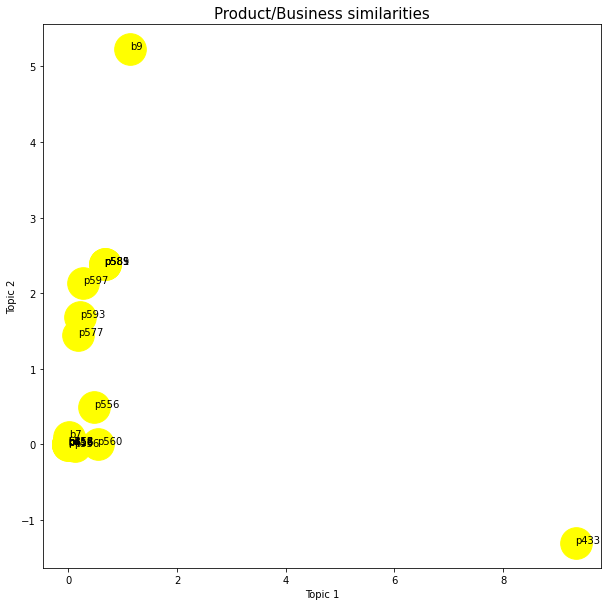

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
X = topic_encoded_df['topic 1']
Y = topic_encoded_df['topic 2']
plt.scatter(X,Y,s=1000,color="yellow")
plt.xlabel('Topic 1')
plt.ylabel('Topic 2')
plt.title("Product/Business similarities",fontsize=15)
for i, label in enumerate(topic_encoded_df.item):
    plt.text(X[i], Y[i], label)
plt.show()

### Term-topic enconding matrix

In [ ]:
dictionary = lsa.vectorizer.get_feature_names()
dictionary

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10ª',
 '16gb',
 '1tb',
 '2666mhz',
 '4gb',
 '50algod',
 '50poliést',
 '64gb',
 'academ',
 'algod',
 'além',
 'and',
 'anim',
 'ano',
 'artific',
 'através',
 'audiovis',
 'autonom',
 'behring',
 'bits192khz',
 'black',
 'blus',
 'científ',
 'ciênc',
 'combin',
 'compact',
 'comput',
 'conect',
 'consult',
 'consum',
 'cont',
 'cor',
 'core',
 'cristã',
 'dad',
 'ddr4',
 'dedic',
 'desenh',
 'desenvolv',
 'desktop',
 'disposi',
 'educ',
 'efici',
 'eleven',
 'empoder',
 'equip',
 'especi',
 'ess',
 'est',
 'estamp',
 'estend',
 'expans',
 'facilit',
 'femenin',
 'fifty',
 'fio',
 'fiv',
 'four',
 'fourteen',
 'front',
 'full',
 'gam',
 'garant',
 'ger',
 'gest',
 'gg',
 'graphic',
 'grav',
 'gráf',
 'guit',
 'harddriv',
 'hd',
 'hom',
 'hundred',
 'i310100',
 'intel',
 'intelig',
 'interfac',
 'jog',
 'languag',
 'laptop',
 'lenov',
 'limp',
 'linh',
 'livr',
 'loj',
 'maxim',
 'memory',
 'memór',
 'mesm',
 'microfon',
 'mid',
 'minut',
 'muscul',
 'necessár',
 'notebook',
 'oferec',


In [ ]:
term_encoded_df = pd.DataFrame(svdInstance.components_, index = ["topic 1", "topic 2", "topic 3"], columns = dictionary).T
#display(enconding_matrix)
term_encoded_df.style

,topic 1,topic 2,topic 3
10ª,0.011254,0.008886,0.215601
16gb,0.000063,0.000178,0.003494
1tb,0.005370,0.009048,0.127947
2666mhz,0.005307,0.008870,0.124453
4gb,0.005307,0.008870,0.124453
50algod,0.002007,0.026050,-0.002931
50poliést,0.002400,0.030175,-0.003275
64gb,0.005307,0.008870,0.124453
academ,0.000000,-0.000000,0.000000
algod,0.052722,0.383916,-0.029391


#### Plot term-topic encoded data

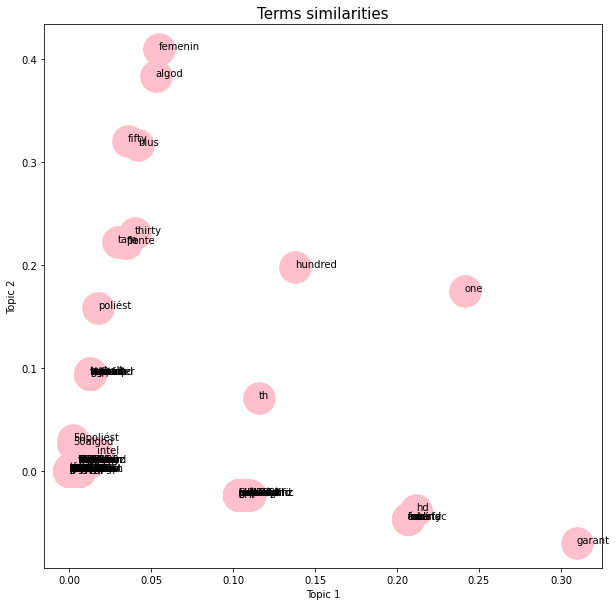

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
X = term_encoded_df['topic 1']
Y = term_encoded_df['topic 2']
plt.scatter(X,Y,s=1000,color="pink")
plt.xlabel('Topic 1')
plt.ylabel('Topic 2')
plt.title("Terms similarities",fontsize=15)
for i, label in enumerate(dictionary):
    plt.text(X[i], Y[i], label)
plt.show()

## LSI
For the search machines.
[Here](https://medium.com/@adi_enasoaie/easy-lsi-pipeline-using-scikit-learn-a073f2484408) we have a nice material.

### Libraries

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords

### Query

In [ ]:
#query = "aonde comprar adubo urgentemente. Desejo adubo para plantar arroz"
query = "queria encontrar um computador bom para comprar hoje. Tem notebook ?"
qDf = pd.DataFrame({'item':'user',	'description':query}, index=[0])
display(qDf)

,item,description
0,user,queria encontrar um computador bom para compra...


### Cleaning the query (text)

In [ ]:
qPp = Preprocessing(corpus = qDf.description, tokenFunction = nltk.word_tokenize)
qPp.computePreprocessing()
qDf['stemmedDescription'] = qPp.newCorpus[0][0]
qDf['lemmedDescription'] = qPp.newCorpus[0][1]
display(qDf)

,item,description,stemmedDescription,lemmedDescription
0,user,queria encontrar um computador bom para compra...,quer encontr um comput bom par compr hoj tem n...,computador


### Reading the vectorizer

In [ ]:
vectorizer = pickle.load(open("vectorizer.pickle", "rb"))

#### Reading the bag of words

In [ ]:
bagOfWords = pickle.load(open("bagOfWords.pickle", "rb"))
#bagOfWords.todense()

### Bag of words

In [ ]:
qBagOfWords = vectorizer.transform(raw_documents=qDf.stemmedDescription)
#print(type(qBagOfWords))
#qBagOfWords.todense()


In [ ]:
qBowDf = pd.DataFrame(qBagOfWords.todense(), columns=vectorizer.get_feature_names_out())
qBowDf.insert(loc=0, column='item', value=qDf.item)
qBowDf = qBowDf.append(lsa.bowDf)
display(qBowDf)

,item,10ª,16gb,1tb,2666mhz,4gb,50algod,50poliést,64gb,academ,...,uphor,usb,v50,variedad,veloc,versátil,videocard,window,xbox,áudi
0,user,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,p597,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,p593,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,p589,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,p585,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,p581,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,p577,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,p560,1,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0
7,p556,1,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
8,p536,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Computing BOW-based Cosine distances
Cosine distance is defined as 1.0 minus the cosine similarity. See [this link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_distances.html).

In [ ]:
from sklearn.metrics import pairwise_distances
bowDistances = pairwise_distances(qBagOfWords, 
                                     bagOfWords, 
                                     metric='cosine', 
                                     n_jobs=-1)
#bowDistances

In [ ]:
qbowDistancesDf = pd.DataFrame(data=bowDistances.transpose(), columns= ['query distance'])
qbowDistancesDf['item']= df.item#, 'query distance': similarities})
qbowDistancesDf['description']= df.description#, 'query distance': similarities})
print('query: '+query)
display(qbowDistancesDf.sort_values(ascending=True, by=['query distance']))

query: queria encontrar um computador bom para comprar hoje. Tem notebook ?


,query distance,item,description
20,0.591752,b1,"computação, tecnologia"
8,0.711325,p536,Plataforma para ciência de dados.
13,0.764298,p356,Notebook 14''\n1TB SSD\n16GB RAM
6,0.896305,p560,"O desktop compacto Lenovo V50s é rápido, respo..."
11,0.938801,p433,Behringer - UMC 204 HD\nEste produto conta com...
18,1.000000,b3,"academia, musculação, livros, educação"
17,1.000000,b4,Tecnologia; \nInteligência Artificial; \nCiênc...
16,1.000000,b6,"Tecnologia, Gestão, Consultoria, Audiovisual, ..."
15,1.000000,b7,Trabalho com pesquisa científica e desenvolvim...
14,1.000000,b9,Somos uma loja online especializada em blusas ...


### Computing SVD-based Cosine distances
To be developed...

In [ ]:
qLsa = svd.transform(qBagOfWords)
#qLsa = svd.fit_transform(qBagOfWords)
qLsa

In [ ]:
#?????
#svd.components_.dot(qBagOfWords.todense())
print(svd.components_.shape)
print(qBagOfWords.shape)
pd.np.array(svd.components_)*pd.np.array(qBagOfWords)

In [ ]:
from sklearn.metrics import pairwise_distances
#?????
svdSimilarities = pairwise_distances(qLsa, 
                                     bagOfWords, 
                                     metric='cosine', 
                                     n_jobs=-1)

In [ ]:
qSvdSimilaritiesDf = pd.DataFrame(data=svdSimilarities.transpose(), columns= ['query distance'])
qSvdSimilaritiesDf['item']= df.item#, 'query distance': similarities})
qSvdSimilaritiesDf['description']= df.description#, 'query distance': similarities})
print('query: '+query)
display(qSvdSimilaritiesDf)